# 01 - Introduction to Machine Learning

by [Alejandro Correa Bahnsen](http://www.albahnsen.com/) & [Iván Torroledo](http://www.ivantorroledo.com/)

version 1.3, May 2018

## Part of the class [Applied Deep Learning](https://github.com/albahnsen/AppliedDeepLearningClass)



This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Jake Vanderplas](http://www.vanderplas.com)

## What is Machine Learning?

In this section we will begin to explore the basic principles of machine learning.
Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.

We'll take a look at two very simple machine learning tasks here.
The first is a **classification** task: the figure shows a
collection of two-dimensional data, colored according to two different class
labels. 

### Type of Learning

Usually, ML problems can be classified according to the learning type. Two of the more importants are:

* **Supervised Learning:**

Supervised Learning models is the set of algorithms that tries to approximate a function $f(x)$ that represents the relation between a dependent variable $Y$ (label, target) and an independent set of variables $X$. This characteristic makes supervised algorithms a type of predictive models, such that given a set of $X$ data, it can be forecasted dependent $Y$ variable. 

According to the type of values in $Y$, it can be define two main types of problems and algorithms to analyze data:

- Classification Problems:

Whether dependent variable $Y$ define a group of categories (not ordered values) like approved and denied or good and bad, the task of predict $Y$ variable can be defined as a classification problem. The output variables are often called labels or categories.

Some examples of Classification algorithms are:
```
Logistic Regression, Decision Trees, Random Forest, KNN and Suppor Vector Machine.
```

- Regression Problems:

A regression problem is the task of predict a dependent (target) variable $Y$ with continous values. Some examples of regression problems can be: the prediction of the price of a stock or the number of potential customers for a product.

Some examples of Regression algorithms are:
```
Linear Regression, Decision Trees, Neural Networks. 
```

* **Unsupervised Learning:**
    
Opposite to Supervised Learnig, in Unsupervised Learning dependent variable or labeled data $Y$ is not included in the data set. Then insted of predict a variable, this set of algorithms tries to use techniques in the input data $X$ to detect patterns, find rules, or summarize and group data. Usually, Unsupervised algorithms are mainly used in descriptive anlysis and modelling, where is particularly useful to find out insights and information that human expert doesn't know. In Unsupervised Learning, there are two main tasks:

- Dimensionality Reduction: 

Dimensionality reduction is the methodology to reduce the amount of variables in dataset $X$ that are into consideration. One of the most important methods applied in dimensionality reduction is the Principal Component Analysis (PCA). 

- Clustering Analysis: 

Cluster analysis or clustering is the task of grouping a set of data $X$ in such way that segments of $X$ in the same group are more similar between them than to those in other groups (clusters). It is the most common technique for exploratory data mining and data analysis. An example of this algorithms are k-means.


#### Other Types of Learing

Despite Supervised and Unsupervised Learning cover a vast amount of techiniques to use, there area other less common but usefull Learning types like Semi-Supervised Learning and Reinforcement Learnig. However these are outside the scope of this course. To read more about:

https://medium.com/machine-learning-for-humans/reinforcement-learning-6eacf258b265

In [1]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## 1. Supervised Learning 

### 1.1 Classification Problem

The first task we are going to study is a **classification** problem: the figure shows a collection of two-dimensional data, colored according to two different class labels.

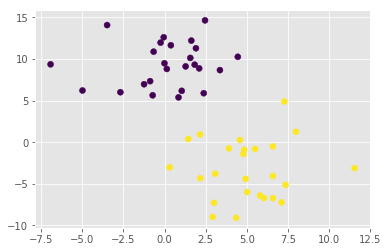

In [2]:
# Create a random set of examples
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(n_samples=50, centers=2,random_state=23, cluster_std=2.90)

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

A classification algorithm may be used to draw a dividing boundary
between the two clusters of points:

In [3]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)
clf.fit(X, Y)

SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=200, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [4]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .05), np.arange(y_min, y_max, .05))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

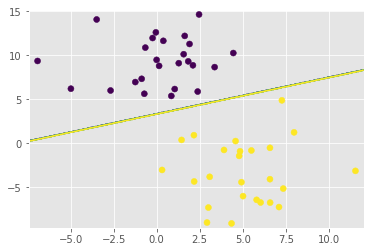

In [5]:
plt.contour(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

This may seem like a trivial task, but it is a simple version of a very important concept.
By drawing this separating line, we have learned a model which can **generalize** to new
data: if you were to drop another point onto the plane which is unlabeled, this algorithm
could now **predict** whether it's a blue or a red point.

The next simple task we'll look at is a **regression** task: a simple best-fit line
to a set of data:

### 1.2 Regression Problem

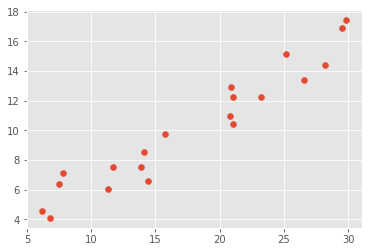

In [6]:
a = 0.5
b = 1.0

# x from 0 to 10
x = 30 * np.random.random(20)

# y = a*x + b with noise
y = a * x + b + np.random.normal(size=x.shape)

plt.scatter(x, y)

In [7]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x[:, None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# underscore at the end indicates a fit parameter
print(clf.coef_)
print(clf.intercept_)

[0.49187909]
1.4632686323249384


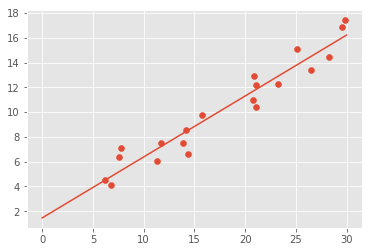

In [9]:
x_new = np.linspace(0, 30, 100)
y_new = clf.predict(x_new[:, None])
plt.scatter(x, y)
plt.plot(x_new, y_new)

Again, this is an example of fitting a model to data, such that the model can make
generalizations about new data.  The model has been **learned** from the training
data, and can be used to predict the result of test data:
here, we might be given an x-value, and the model would
allow us to predict the y value.  Again, this might seem like a trivial problem,
but it is a basic example of a type of operation that is fundamental to
machine learning tasks.

## Representation of Data in Scikit-learn

Machine learning is about creating models from data: for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on our matplotlib examples from the previous section and show some
examples of how to visualize data.

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

## A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the
iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.
There are three species of iris in the dataset, which we can picture here:

In [10]:
from IPython.core.display import Image, display

display(Image(url='images/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(url='images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(url='images/iris_virginica.jpg'))
print("Iris Virginica")

display(Image(url='images/iris_with_length.png'))
print('Iris versicolor and the petal and sepal width and length')
print('From, Python Data Analytics, Apress, 2015.')

Iris Setosa



Iris Versicolor



Iris Virginica


Iris versicolor and the petal and sepal width and length
From, Python Data Analytics, Apress, 2015.


### Quick Question:

**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [12]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [13]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [14]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


## 2. Unsupervised Learning 

### 2.1 Dimensionality Reduction: PCA

Principle Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance.

Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it:

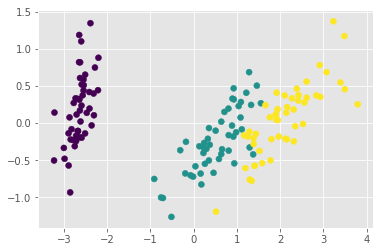

In [15]:
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
X_reduced = pca.transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

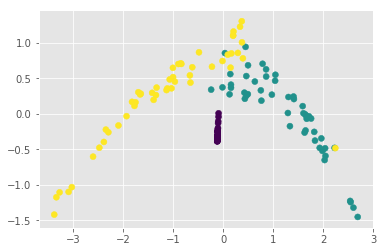

In [16]:
X, y = iris.data, iris.target
from sklearn.manifold import Isomap
pca = Isomap(n_components=3)
pca.fit(X)
X_reduced2 = pca.transform(X)
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y)

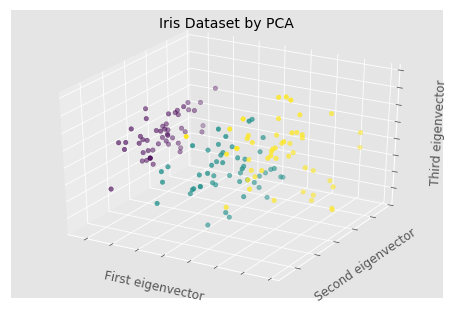

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Iris Dataset by PCA', size=14)
ax.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2], c=y)
ax.set_xlabel('First eigenvector')
ax.set_ylabel('Second eigenvector')
ax.set_zlabel('Third eigenvector')
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())
plt.show()

### 2.2 Clustering: K-means

Clustering groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data.

Note that these clusters will uncover relevent hidden structure of the data only if the criterion used highlights it.

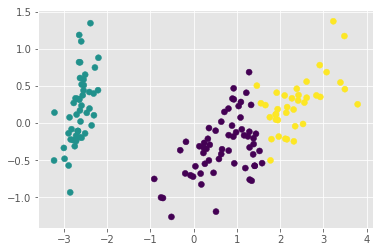

In [18]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred);

Lets then evaluate the performance of the clustering versus the ground truth

In [19]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)
print(cm)

[[ 0 50  0]
 [48  0  2]
 [14  0 36]]


In [20]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

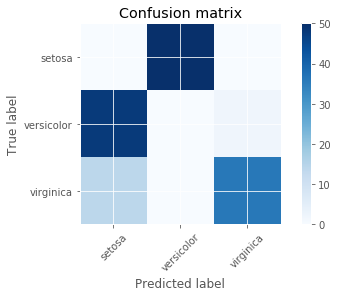

In [21]:
plt.figure()
plot_confusion_matrix(cm)

### A First Model for Classification: Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.4, random_state=42)

In [25]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [27]:
float((y_pred == y_test).mean())


0.9666666666666667

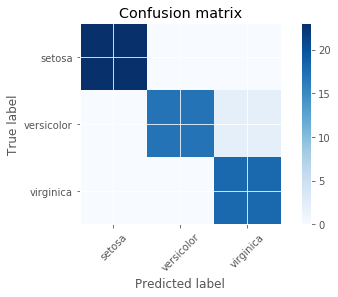

In [28]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

1.0 0.7333333333333333 0.93975 0.038052503932797306


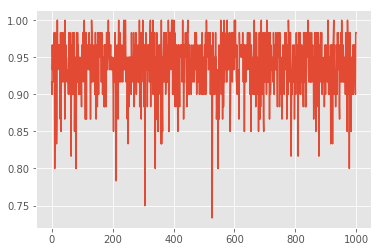

In [29]:
accuracy = []
for i in range(1000):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.4, random_state=i)

    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = float((y_pred == y_test).mean())
    accuracy.append(acc)

plt.plot(list(range(1000)), accuracy)

accuracy = np.array(accuracy)
print(accuracy.max(), accuracy.min(), accuracy.mean(), accuracy.std())

1.0 0.85 0.9488666666666665 0.02240644748479528


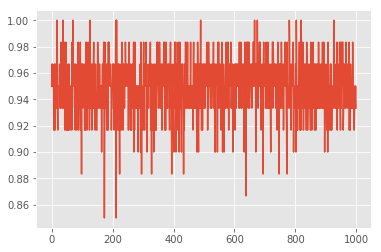

In [30]:
from sklearn.ensemble import RandomForestClassifier

accuracy = []
for i in range(1000):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.4, random_state=i)

    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = float((y_pred == y_test).mean())
    accuracy.append(acc)

plt.plot(list(range(1000)), accuracy)

accuracy = np.array(accuracy)
print(accuracy.max(), accuracy.min(), accuracy.mean(), accuracy.std())

### Recap: Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we'll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.predict()` : predict labels in clustering algorithms.
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

## Flow Chart: How to Choose your Estimator

This is a flow chart created by scikit-learn super-contributor [Andreas Mueller](https://github.com/amueller) which gives a nice summary of which algorithms to choose in various situations. Keep it around as a handy reference!

In [25]:
from IPython.display import Image
Image(url="http://scikit-learn.org/dev/_static/ml_map.png")

Original source on the [scikit-learn website](http://scikit-learn.org/stable/tutorial/machine_learning_map/)